<a href="https://colab.research.google.com/github/ImamHossain-Jawad/Computer-Graphics-Multimedia-Lab-main-main/blob/main/Lab_Assignment_1_0432220005101087_7A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated dataset: [68 75 73 73 68 68 65 62 71 74 62 75]

--- Results ---
Sample size (n): 12
Degrees of freedom (df): 11
Sample mean: 69.500
Sample standard deviation: 4.739
Standard error (SE): 1.368
t-statistic: 3.290
p-value: 0.0072
95% CI: [66.489, 72.511]
Decision at α=0.05: Reject H₀


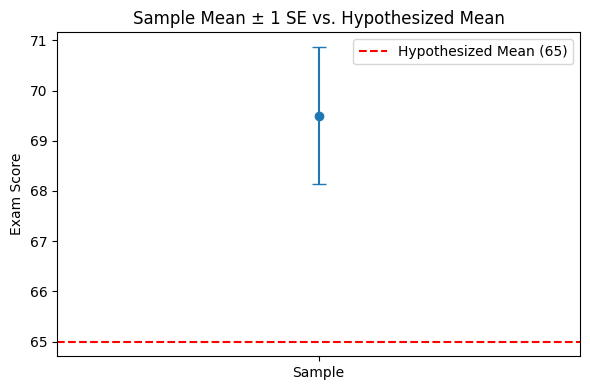


PDF report generated: one_sample_ttest_report.pdf


In [9]:
# --- One-Sample t-Test Assignment (Colab Ready) ---
# Student ID based dataset generation, t-test, visualization, and PDF export

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# ReportLab for PDF generation
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from reportlab.lib.units import inch
from reportlab.lib.utils import ImageReader

# ----------------------
# 1) Setup Student ID
# ----------------------
student_id = "0432220005101087"   # <-- change to your own ID if needed
k = int(student_id[-2:])          # last two digits
offset = k % 5                    # offset for dataset
np.random.seed(k)                 # reproducibility based on ID

# ----------------------
# 2) Generate Dataset
# ----------------------
n = 12
data = 60 + np.random.randint(0, 15, size=n) + offset
hyp_mean = 65.0

print("Generated dataset:", data)

# ----------------------
# 3) Perform One-Sample t-Test
# ----------------------
t_stat, p_value = stats.ttest_1samp(data, popmean=hyp_mean)
df = n - 1
sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)
se = sample_std / np.sqrt(n)

# Confidence Interval (95%)
ci_low, ci_high = stats.t.interval(
    confidence=0.95, df=df, loc=sample_mean, scale=se
    )

# Decision
alpha = 0.05
reject_null = p_value < alpha
decision_text = "Reject H₀" if reject_null else "Fail to reject H₀"

print("\n--- Results ---")
print(f"Sample size (n): {n}")
print(f"Degrees of freedom (df): {df}")
print(f"Sample mean: {sample_mean:.3f}")
print(f"Sample standard deviation: {sample_std:.3f}")
print(f"Standard error (SE): {se:.3f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")
print(f"95% CI: [{ci_low:.3f}, {ci_high:.3f}]")
print(f"Decision at α=0.05: {decision_text}")

# ----------------------
# 4) Visualization
# ----------------------
plt.figure(figsize=(6, 4))
plt.errorbar([0], [sample_mean], yerr=[se], fmt='o', capsize=5)
plt.axhline(hyp_mean, linestyle='--', color="red", label="Hypothesized Mean (65)")
plt.xticks([0], ["Sample"])
plt.ylabel("Exam Score")
plt.title("Sample Mean ± 1 SE vs. Hypothesized Mean")
plt.legend()
plt.tight_layout()
plot_path = "ttest_plot.png"
plt.savefig(plot_path, dpi=200, bbox_inches="tight")
plt.show()

# ----------------------
# 5) Create PDF Report
# ----------------------
pdf_path = "one_sample_ttest_report.pdf"
c = canvas.Canvas(pdf_path, pagesize=letter)
width, height = letter

# Title
c.setFont("Helvetica-Bold", 16)
c.drawString(1 * inch, height - 1 * inch, "One-Sample t-Test Report")

# Write results
c.setFont("Helvetica", 11)
y = height - 1.4 * inch

lines = [
    f"Student ID: {student_id}",
    f"Last two digits (k): {k}",
    f"k % 5: {offset}",
    f"Dataset Rule: exam scores = 60 + randint(0, 15, size=12) + (k % 5)",
    "",
    "Hypotheses:",
    "  H₀: The population mean = 65",
    "  H₁: The population mean ≠ 65",
    "",
    "Results:",
    f"  Sample size (n): {n}",
    f"  Degrees of freedom (df): {df}",
    f"  Sample mean: {sample_mean:.3f}",
    f"  Sample standard deviation: {sample_std:.3f}",
    f"  Standard error (SE): {se:.3f}",
    f"  t-statistic: {t_stat:.3f}",
    f"  p-value: {p_value:.4f}",
    f"  95% CI for mean: [{ci_low:.3f}, {ci_high:.3f}]",
    f"Decision at α = 0.05: {decision_text}",
]

for line in lines:
    c.drawString(1 * inch, y, line)
    y -= 14

# Insert plot
img = ImageReader(plot_path)
c.drawImage(img, 1 * inch, y - 3.2 * inch, width=5.2 * inch, height=3.2 * inch)

c.save()

print(f"\nPDF report generated: {pdf_path}")